#📌 Extracción

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
df = pd.read_json('/content/TelecomX_Data.json')
df


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

In [61]:
# Normalizar cada una de las columnas del dataframe
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

In [62]:
# Extrae las columnas que no JSON (customerID y Churn)
customerID = df['customerID']
Churn = df['Churn']


In [63]:
# concatenar las columnas en un solo dataframe
df = pd.concat([customerID, Churn, df_customer, df_phone, df_internet, df_account], axis=1)

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [64]:
# Abrir archivo .md y mostrar el contenido del diccionario como texto
with open('TelecomX_diccionario.md', 'r', encoding='utf-8') as f:
    contenido = f.read()

print(contenido)


#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: t

In [65]:
# Ver cuántos valores nulos hay por columna
df.isnull().sum()


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [66]:
# Mostrar todas las filas que tienen al menos un valor nulo
print ('El numero de valores nulos es:', len(df[df.isnull().any(axis=1)]))

El numero de valores nulos es: 0


In [67]:
df.shape

(7267, 21)

In [68]:
# Filas que están duplicadas exactamente (incluida la primera aparición)
duplicados_completos = df[df.duplicated(keep=False)]

# Opcional: Ordenar para que las filas duplicadas queden juntas
duplicados_ordenados = duplicados_completos.sort_values(by=df.columns.tolist())


print('El numero de filas duplicadas es: ', len(duplicados_ordenados))


El numero de filas duplicadas es:  0


In [69]:
# Verificar los tipos de datos
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [70]:
# Verificacion del tipo de dato de cada uno de los valores contenidos en las columnas tipo object
columnas = [
    'customerID',	'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total'
]

for col in columnas:
    print(f"Tipos en la columna '{col}':")
    print(df[col].apply(type).value_counts())
    print("-" * 40)


Tipos en la columna 'customerID':
customerID
<class 'str'>    7267
Name: count, dtype: int64
----------------------------------------
Tipos en la columna 'Churn':
Churn
<class 'str'>    7267
Name: count, dtype: int64
----------------------------------------
Tipos en la columna 'gender':
gender
<class 'str'>    7267
Name: count, dtype: int64
----------------------------------------
Tipos en la columna 'SeniorCitizen':
SeniorCitizen
<class 'int'>    7267
Name: count, dtype: int64
----------------------------------------
Tipos en la columna 'Partner':
Partner
<class 'str'>    7267
Name: count, dtype: int64
----------------------------------------
Tipos en la columna 'Dependents':
Dependents
<class 'str'>    7267
Name: count, dtype: int64
----------------------------------------
Tipos en la columna 'tenure':
tenure
<class 'int'>    7267
Name: count, dtype: int64
----------------------------------------
Tipos en la columna 'PhoneService':
PhoneService
<class 'str'>    7267
Name: count, dtyp

In [71]:
# Cambio de tipo 'object' de la columna 'Charges.Total' a tipo 'float'

# Convertir los valores no numéricos en NaN, y encadenar .fillna(0.0) para reemplazar esos NaN por 0.0,
# para realizar el cambio de tipo 'object' a 'float'.
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# Verifica si la conversión funcionó
print(df['Charges.Total'].apply(type).value_counts())
print(df['Charges.Total'].isna().sum())



Charges.Total
<class 'float'>    7267
Name: count, dtype: int64
11


In [72]:
#Volver a verificar que los 11 valores NaN sean remplazados por float 0.0
# 1. Convertir a número, forzando errores a NaN
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# 2. Reemplazar los NaN resultantes por 0.0
df['Charges.Total'] = df['Charges.Total'].fillna(0.0)

# Verificación
print(df['Charges.Total'].apply(type).value_counts())
print(df['Charges.Total'].isna().sum())

Charges.Total
<class 'float'>    7267
Name: count, dtype: int64
0


In [73]:
# Estandarización de los encabezados de las columnas
import re

# Función para estandarizar los nombres de las columnas
def estandarizar_columna(nombre):
    nombre = re.sub(r'(?<=[a-z])(?=[A-Z])', '_', nombre)  # separa camel case, Reemplazando cada coincidencia del patrón con un guion bajo (_) en la variable nombre.
    nombre = nombre.replace('.', '_')                     # reemplaza puntos
    nombre = nombre.strip().lower()                       # minúsculas y sin espacios
    return nombre

# Aplicar la función a los nombres de las columnas
df.columns = [estandarizar_columna(col) for col in df.columns]
df.columns


Index(['customer_id', 'churn', 'gender', 'senior_citizen', 'partner',
       'dependents', 'tenure', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method', 'charges_monthly',
       'charges_total'],
      dtype='object')

In [74]:
df.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [75]:
# Estandarizacion en los registros de las columnas 'object'

for col in df.select_dtypes(include='object').columns:
    df[col] = (
        df[col]
        .astype(str)                                 # Asegura strings
        .str.strip()                                 # Elimina espacios al inicio/final
        .str.lower()                                 # Convierte a minúsculas
        .str.replace(r'[\s\-]+', '_', regex=True)    # Reemplaza espacios y guiones medio por guion bajo
    )

df


,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
0,0002_orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one_year,yes,mailed_check,65.60,593.30
1,0003_mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month_to_month,no,mailed_check,59.90,542.40
2,0004_tlhlj,yes,male,0,no,no,4,yes,no,fiber_optic,...,no,yes,no,no,no,month_to_month,yes,electronic_check,73.90,280.85
3,0011_igkff,yes,male,1,yes,no,13,yes,no,fiber_optic,...,yes,yes,no,yes,yes,month_to_month,yes,electronic_check,98.00,1237.85
4,0013_exchz,yes,female,1,yes,no,3,yes,no,fiber_optic,...,no,no,yes,yes,no,month_to_month,yes,mailed_check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987_lutyd,no,female,0,no,no,13,yes,no,dsl,...,no,no,yes,no,no,one_year,no,mailed_check,55.15,742.90
7263,9992_rramn,yes,male,0,yes,no,22,yes,yes,fiber_optic,...,no,no,no,no,yes,month_to_month,yes,electronic_check,85.10,1873.70
7264,9992_ujoel,no,male,0,no,no,2,yes,no,dsl,...,yes,no,no,no,no,month_to_month,yes,mailed_check,50.30,92.75
7265,9993_lhieb,no,male,0,yes,yes,67,yes,no,dsl,...,no,yes,yes,no,yes,two_year,no,mailed_check,67.85,4627.65


In [76]:
#Mostrar valores únicos por cada columna
for col in df.columns:
    print(f"\nColumna: '{col}'")
    print(df[col].unique())



Columna: 'customer_id'
['0002_orfbo' '0003_mknfe' '0004_tlhlj' ... '9992_ujoel' '9993_lhieb'
 '9995_hotoh']

Columna: 'churn'
['no' 'yes' '']

Columna: 'gender'
['female' 'male']

Columna: 'senior_citizen'
[0 1]

Columna: 'partner'
['yes' 'no']

Columna: 'dependents'
['yes' 'no']

Columna: 'tenure'
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Columna: 'phone_service'
['yes' 'no']

Columna: 'multiple_lines'
['no' 'yes' 'no_phone_service']

Columna: 'internet_service'
['dsl' 'fiber_optic' 'no']

Columna: 'online_security'
['no' 'yes' 'no_internet_service']

Columna: 'online_backup'
['yes' 'no' 'no_internet_service']

Columna: 'device_protection'
['no' 'yes' 'no_internet_service']

Columna: 'tech_support'
['yes' 'no' 'no_internet_service']

Columna: 'streaming_tv'
['yes' 'no' 'no_internet_service']

Columna: 's

In [77]:
# Cantidad de cadenas vacias en la columna 'churn'

num_cadenas_vacias = (df['churn'] == '').sum()
print(num_cadenas_vacias)


224


Debido a que entre los datos que maneja la columna 'churn' esta el de cadena vacia:['No' 'Yes' ''], no es posible saber si esos clientes fueron dados de baja o no, por lo tando estas filas seran eliminadas y guardadas en un archivo, "clientes_por_vericar.csv", con el fin de que se defina la condición de sus clientes para hacer un analisis posterior. Ademas se puede verifica que la cantidad de filas eliminadas es 224 lo cual representa apenas: (224/7267) * 100 = 3.1%, lo cual no es representativo para nuestro analisis estadistico

In [78]:
# Guardar filas eliminadas

# Filtrar las filas donde 'churn' es una cadena vacía
filas_vacias = df[df['churn'] == '']

# Guardar esas filas en un archivo CSV
filas_vacias.to_csv('clientes_por_vericar.csv', index=False)



In [79]:
# verificacion del archivo 'clientes_por_vericar.csv'

df_clientes_por_vericar = pd.read_csv('/content/clientes_por_vericar.csv', keep_default_na=False)
df_clientes_por_vericar.head()


,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
0,0047_zhdtw,,female,0,no,no,11,yes,yes,fiber_optic,...,no,no,no,no,no,month_to_month,yes,bank_transfer_(automatic),79.00,929.30
1,0120_yzlqa,,male,0,no,no,71,yes,no,no,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,yes,credit_card_(automatic),19.90,1355.10
2,0154_qyhju,,male,0,no,no,29,yes,no,dsl,...,yes,no,yes,no,no,one_year,yes,electronic_check,58.75,1696.20
3,0162_rzgmz,,female,1,no,no,5,yes,no,dsl,...,yes,no,yes,no,no,month_to_month,no,credit_card_(automatic),59.90,287.85
4,0274_vvqoq,,male,1,yes,no,65,yes,yes,fiber_optic,...,yes,yes,no,yes,yes,one_year,yes,bank_transfer_(automatic),103.15,6792.45


In [80]:
# Eliminar en el dataframe original, df, las filas donde la columna 'churn', tenga cadenas vacias

# Mantener solo las filas donde churn NO es cadena vacía
# Convertir en una copia explícita el resultado del filtro, porque sino se hace pandas podria
# pensar que la asignacion, df, es una vista, y va ha generar una Advertencia cuando adicione la columna 'charges_monthly' :
df = df[df['churn'] != ''].copy()
df


,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
0,0002_orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one_year,yes,mailed_check,65.60,593.30
1,0003_mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month_to_month,no,mailed_check,59.90,542.40
2,0004_tlhlj,yes,male,0,no,no,4,yes,no,fiber_optic,...,no,yes,no,no,no,month_to_month,yes,electronic_check,73.90,280.85
3,0011_igkff,yes,male,1,yes,no,13,yes,no,fiber_optic,...,yes,yes,no,yes,yes,month_to_month,yes,electronic_check,98.00,1237.85
4,0013_exchz,yes,female,1,yes,no,3,yes,no,fiber_optic,...,no,no,yes,yes,no,month_to_month,yes,mailed_check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987_lutyd,no,female,0,no,no,13,yes,no,dsl,...,no,no,yes,no,no,one_year,no,mailed_check,55.15,742.90
7263,9992_rramn,yes,male,0,yes,no,22,yes,yes,fiber_optic,...,no,no,no,no,yes,month_to_month,yes,electronic_check,85.10,1873.70
7264,9992_ujoel,no,male,0,no,no,2,yes,no,dsl,...,yes,no,no,no,no,month_to_month,yes,mailed_check,50.30,92.75
7265,9993_lhieb,no,male,0,yes,yes,67,yes,no,dsl,...,no,yes,yes,no,yes,two_year,no,mailed_check,67.85,4627.65


In [81]:
# verificar que se hayan eliminado las filas con cadena vacia de la columna 'churn'
print(f"Valores unicos en la columna 'churn': {df['churn'].unique()}")



Valores unicos en la columna 'churn': ['no' 'yes']


In [82]:
# Veificacion de numero de filas
df.shape

(7043, 21)

In [83]:
# "Restablecer índices"
df.reset_index(drop=True, inplace=True)


In [84]:
# Creacion de columna cuentas diarias
df['daily_account'] = df['charges_monthly'] / 30
df.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,daily_account
0,0002_orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one_year,yes,mailed_check,65.6,593.30,2.186667
1,0003_mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month_to_month,no,mailed_check,59.9,542.40,1.996667
2,0004_tlhlj,yes,male,0,no,no,4,yes,no,fiber_optic,...,yes,no,no,no,month_to_month,yes,electronic_check,73.9,280.85,2.463333
3,0011_igkff,yes,male,1,yes,no,13,yes,no,fiber_optic,...,yes,no,yes,yes,month_to_month,yes,electronic_check,98.0,1237.85,3.266667
4,0013_exchz,yes,female,1,yes,no,3,yes,no,fiber_optic,...,no,yes,yes,no,month_to_month,yes,mailed_check,83.9,267.40,2.796667


In [85]:
# Paso 1: Sacar la columna
columna = df.pop('daily_account')

# Paso 2: Insertarla en la posición deseada (posición 20 → índice 19)
df.insert(19, 'daily_account', columna)
df.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,daily_account,charges_monthly,charges_total
0,0002_orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one_year,yes,mailed_check,2.186667,65.6,593.30
1,0003_mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month_to_month,no,mailed_check,1.996667,59.9,542.40
2,0004_tlhlj,yes,male,0,no,no,4,yes,no,fiber_optic,...,yes,no,no,no,month_to_month,yes,electronic_check,2.463333,73.9,280.85
3,0011_igkff,yes,male,1,yes,no,13,yes,no,fiber_optic,...,yes,no,yes,yes,month_to_month,yes,electronic_check,3.266667,98.0,1237.85
4,0013_exchz,yes,female,1,yes,no,3,yes,no,fiber_optic,...,no,yes,yes,no,month_to_month,yes,mailed_check,2.796667,83.9,267.40


In [86]:
# redondear decimales a un digito
columnas = ['daily_account', 'charges_monthly', 'charges_total']
df[columnas] = df[columnas].round(1)
df.head()


,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,daily_account,charges_monthly,charges_total
0,0002_orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one_year,yes,mailed_check,2.2,65.6,593.3
1,0003_mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month_to_month,no,mailed_check,2.0,59.9,542.4
2,0004_tlhlj,yes,male,0,no,no,4,yes,no,fiber_optic,...,yes,no,no,no,month_to_month,yes,electronic_check,2.5,73.9,280.8
3,0011_igkff,yes,male,1,yes,no,13,yes,no,fiber_optic,...,yes,no,yes,yes,month_to_month,yes,electronic_check,3.3,98.0,1237.8
4,0013_exchz,yes,female,1,yes,no,3,yes,no,fiber_optic,...,no,yes,yes,no,month_to_month,yes,mailed_check,2.8,83.9,267.4


In [87]:
# Verificar que la columna recien creada, 'daily_account' sea tipo float
df['daily_account'].dtype

dtype('float64')

In [88]:
# Traducir los encabezados de las columnas
df = df.rename(columns={
    'customer_id': 'id_cliente',
    'churn': 'desafiliado',
    'gender': 'genero',
    'senior_citizen': 'persona_mayor',
    'partner': 'pareja',
    'dependents': 'dependientes',
    'tenure': 'antiguedad',
    'phone_service': 'servicio_telefonico',
    'multiple_lines': 'multiples_lineas',
    'internet_service': 'servicio_de_internet',
    'online_security': 'seguridad_en_linea',
    'online_backup': 'copia_de_seguridad_en_linea',
    'device_protection': 'proteccion_de_dispositivos',
    'tech_support': 'soporte_tecnico',
    'streaming_tv': 'television_en_streaming',
    'streaming_movies': 'peliculas_en_streaming',
    'contract': 'contrato',
    'paperless_billing': 'facturacion_electronica',
    'payment_method': 'metodo_de_pago',
    'daily_account': 'cargo_diario',
    'charges_monthly': 'cargo_mensual',
    'charges_total': 'cargo_total'
})
df.head()

,id_cliente,desafiliado,genero,persona_mayor,pareja,dependientes,antiguedad,servicio_telefonico,multiples_lineas,servicio_de_internet,...,proteccion_de_dispositivos,soporte_tecnico,television_en_streaming,peliculas_en_streaming,contrato,facturacion_electronica,metodo_de_pago,cargo_diario,cargo_mensual,cargo_total
0,0002_orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one_year,yes,mailed_check,2.2,65.6,593.3
1,0003_mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month_to_month,no,mailed_check,2.0,59.9,542.4
2,0004_tlhlj,yes,male,0,no,no,4,yes,no,fiber_optic,...,yes,no,no,no,month_to_month,yes,electronic_check,2.5,73.9,280.8
3,0011_igkff,yes,male,1,yes,no,13,yes,no,fiber_optic,...,yes,no,yes,yes,month_to_month,yes,electronic_check,3.3,98.0,1237.8
4,0013_exchz,yes,female,1,yes,no,3,yes,no,fiber_optic,...,no,yes,yes,no,month_to_month,yes,mailed_check,2.8,83.9,267.4


In [89]:
# Traducir al español los registros

# Diccionario de traducción para todos los valores únicos
traduccion = {
    # Valores generales yes/no
    'yes': 'si',
    'no': 'no',

    # Género
    'female': 'femenino',
    'male': 'masculino',

    # Servicios específicos
    'no_phone_service': 'sin_servicio_telefonico',
    'no_internet_service': 'sin_servicio_de_internet',

    # Servicio de internet
    'dsl': 'dsl',
    'fiber_optic': 'fibra_optica',

    # Tipos de contrato
    'one_year': 'un_ano',
    'month_to_month': 'mes_a_mes',
    'two_year': 'dos_anos',

    # Métodos de pago
    'mailed_check': 'cheque_por_correo',
    'electronic_check': 'cheque_electronico',
    'credit_card_(automatic)': 'tarjeta_de_credito_(automatico)',
    'bank_transfer_(automatic)': 'transferencia_bancaria_(automatico)'
}

# Aplicar replace() a todo el DataFrame para traducir los valores
df = df.replace(traduccion)

df.tail()

,id_cliente,desafiliado,genero,persona_mayor,pareja,dependientes,antiguedad,servicio_telefonico,multiples_lineas,servicio_de_internet,...,proteccion_de_dispositivos,soporte_tecnico,television_en_streaming,peliculas_en_streaming,contrato,facturacion_electronica,metodo_de_pago,cargo_diario,cargo_mensual,cargo_total
7038,9987_lutyd,no,femenino,0,no,no,13,si,no,dsl,...,no,si,no,no,un_ano,no,cheque_por_correo,1.8,55.2,742.9
7039,9992_rramn,si,masculino,0,si,no,22,si,si,fibra_optica,...,no,no,no,si,mes_a_mes,si,cheque_electronico,2.8,85.1,1873.7
7040,9992_ujoel,no,masculino,0,no,no,2,si,no,dsl,...,no,no,no,no,mes_a_mes,si,cheque_por_correo,1.7,50.3,92.8
7041,9993_lhieb,no,masculino,0,si,si,67,si,no,dsl,...,si,si,no,si,dos_anos,no,cheque_por_correo,2.3,67.8,4627.6
7042,9995_hotoh,no,masculino,0,si,si,63,no,sin_servicio_telefonico,dsl,...,si,no,si,si,dos_anos,no,cheque_electronico,2.0,59.0,3707.6


In [90]:
df.to_excel("clientes_final.xlsx", index=True)
df.shape

(7043, 22)

In [91]:
df_excel = pd.read_excel('/content/clientes_final.xlsx')
df_excel.head(10)


,Unnamed: 0,id_cliente,desafiliado,genero,persona_mayor,pareja,dependientes,antiguedad,servicio_telefonico,multiples_lineas,...,proteccion_de_dispositivos,soporte_tecnico,television_en_streaming,peliculas_en_streaming,contrato,facturacion_electronica,metodo_de_pago,cargo_diario,cargo_mensual,cargo_total
0,0,0002_orfbo,no,femenino,0,si,si,9,si,no,...,no,si,si,no,un_ano,si,cheque_por_correo,2.2,65.6,593.3
1,1,0003_mknfe,no,masculino,0,no,no,9,si,si,...,no,no,no,si,mes_a_mes,no,cheque_por_correo,2.0,59.9,542.4
2,2,0004_tlhlj,si,masculino,0,no,no,4,si,no,...,si,no,no,no,mes_a_mes,si,cheque_electronico,2.5,73.9,280.8
3,3,0011_igkff,si,masculino,1,si,no,13,si,no,...,si,no,si,si,mes_a_mes,si,cheque_electronico,3.3,98.0,1237.8
4,4,0013_exchz,si,femenino,1,si,no,3,si,no,...,no,si,si,no,mes_a_mes,si,cheque_por_correo,2.8,83.9,267.4
5,5,0013_mhzwf,no,femenino,0,no,si,9,si,no,...,no,si,si,si,mes_a_mes,si,tarjeta_de_credito_(automatico),2.3,69.4,571.4
6,6,0013_smeoe,no,femenino,1,si,no,71,si,no,...,si,si,si,si,dos_anos,si,transferencia_bancaria_(automatico),3.7,109.7,7904.2
7,7,0014_bmaqu,no,masculino,0,si,no,63,si,si,...,no,si,no,no,dos_anos,si,tarjeta_de_credito_(automatico),2.8,84.6,5377.8
8,8,0015_uocoj,no,femenino,1,no,no,7,si,no,...,no,no,no,no,mes_a_mes,si,cheque_electronico,1.6,48.2,340.4
9,9,0016_qljis,no,femenino,0,si,si,65,si,si,...,si,si,si,si,dos_anos,si,cheque_por_correo,3.0,90.4,5957.9


#📊 Carga y análisis

In [92]:
#  Análisis Descriptivo
df.describe()


,persona_mayor,antiguedad,cargo_diario,cargo_mensual,cargo_total
count,7043.000000,7043.000000,7043.000000,7043.00000,7043.000000
mean,0.162147,32.371149,2.160173,64.76138,2279.733423
std,0.368612,24.559481,1.000961,30.09058,2266.794030
min,0.000000,0.000000,0.600000,18.20000,0.000000
25%,0.000000,9.000000,1.200000,35.50000,398.600000
50%,0.000000,29.000000,2.300000,70.40000,1394.600000
75%,0.000000,55.000000,3.000000,89.80000,3786.600000
max,1.000000,72.000000,4.000000,118.80000,8684.800000


In [93]:
# Distribución de evasión

# Contar valores y crear DataFrame
df_desafiliacion = df['desafiliado'].value_counts().reset_index()

# Renombrar columnas
df_desafiliacion.columns = ['desafiliado', 'total']

# Calcular el porcentaje
total_general = df_desafiliacion['total'].sum()
df_desafiliacion['porcentaje'] = (df_desafiliacion['total'] / total_general * 100).round(2)

# Ordenar por total descendente (opcional)
df_desafiliacion = df_desafiliacion.sort_values(by='total', ascending=False).reset_index(drop=True)

# Mostrar resultado
df_desafiliacion


,desafiliado,total,porcentaje
0,no,5174,73.46
1,si,1869,26.54


###***Distribución de Evasión***

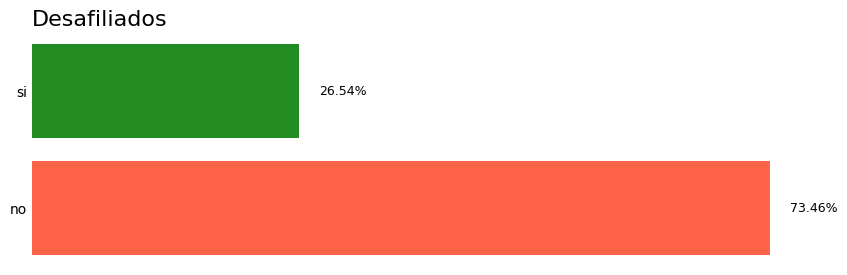

In [94]:

colores =['tomato', 'forestgreen']


fig, ax = plt.subplots(figsize=(10,3))

ax.set_frame_on(False)
ax.xaxis.set_visible(False)
ax.tick_params(axis='y',which='both',size=0)

ax.barh(df_desafiliacion['desafiliado'], df_desafiliacion['porcentaje'],color=colores)
ax.set_title('Desafiliados',
             loc='left',fontsize=16)



for i,j in enumerate(df_desafiliacion['porcentaje']):
  ax.text(j+2,i,  f"{j:.2f}%",color='black',fontsize=9,ha='left',va='center')

plt.show()

####***1. ANALISIS DE DESAFILIADOS:***
De acuerdo al porcentaje de desafiliación (26,54%), este representa aproximadamente una cuarta parte del total de los clientes, lo cual es una proporción significativa

###***Evasión por Género***

In [95]:
# Filtrar solo los clientes desafiliados (valor 'si' en columna desafiliado)
clientes_desafiliados = df[df['desafiliado'] == 'si']

# Contar cuántos clientes desafiliados hay por género
conteo_por_genero = clientes_desafiliados['genero'].value_counts()

# Crear DataFrame con los resultados
resultado_df = pd.DataFrame({
    'genero': conteo_por_genero.index,
    'cantidad_desafiliados': conteo_por_genero.values
})

# Agregar porcentajes
total_desafiliados = resultado_df['cantidad_desafiliados'].sum()
resultado_df['porcentaje'] = (resultado_df['cantidad_desafiliados'] / total_desafiliados * 100).round(2)
resultado_df.head()


,genero,cantidad_desafiliados,porcentaje
0,femenino,939,50.24
1,masculino,930,49.76


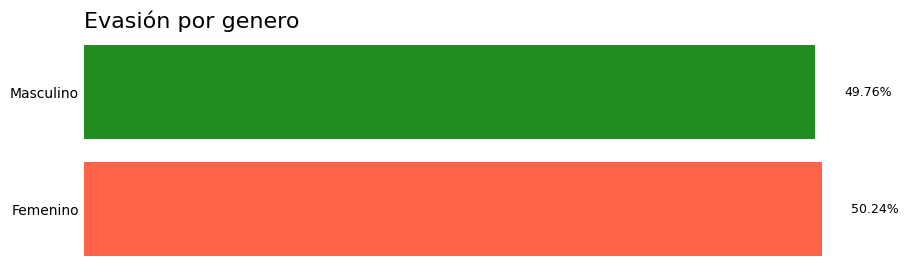

In [96]:
colores =['tomato', 'forestgreen']

fig, ax = plt.subplots(figsize=(10,3))

ax.set_frame_on(False)
ax.xaxis.set_visible(False)
ax.tick_params(axis='y',which='both',size=0)

ax.barh(resultado_df['genero'], resultado_df['porcentaje'],color=colores)
ax.set_title('Evasión por genero',
             loc='left',fontsize=16)



for i,j in enumerate(resultado_df['porcentaje']):
  ax.text(j+2,i,  f"{j:.2f}%",color='black',fontsize=9,ha='left',va='center')

# Crear etiquetas corregidas
etiquetas_correctas = []
for tipo in resultado_df['genero']:
    if tipo == 'femenino':
        etiquetas_correctas.append('Femenino')
    elif tipo == 'masculino':
        etiquetas_correctas.append('Masculino')


# Aplicar las etiquetas corregidas al eje Y
ax.set_yticks(range(len(etiquetas_correctas)))
ax.set_yticklabels(etiquetas_correctas)


plt.show()

####***2. ANALISIS DE EVASIÓN POR GENERO:***
Debido a que los porcentajes de desafiliación por genero son prácticamente iguales, eso significa que no es una causa de desafiliación


###***Evasión por Tipo de Contrato***

In [97]:
# Filtrar solo los clientes desafiliados (valor 'si' en columna desafiliado)
clientes_desafiliados = df[df['desafiliado'] == 'si']

# Contar cuántos clientes desafiliados hay por tipo de contrato
conteo_por_contrato = clientes_desafiliados['contrato'].value_counts()

# Crear DataFrame con los resultados
resultado_contrato_df = pd.DataFrame({
    'tipo_de_contrato': conteo_por_contrato.index,
    'cantidad_desafiliados': conteo_por_contrato.values
})

# Agregar porcentajes
total_desafiliados = resultado_contrato_df['cantidad_desafiliados'].sum()
resultado_contrato_df['porcentaje'] = (resultado_contrato_df['cantidad_desafiliados'] / total_desafiliados * 100).round(2)

resultado_contrato_df.head()

,tipo_de_contrato,cantidad_desafiliados,porcentaje
0,mes_a_mes,1655,88.55
1,un_ano,166,8.88
2,dos_anos,48,2.57


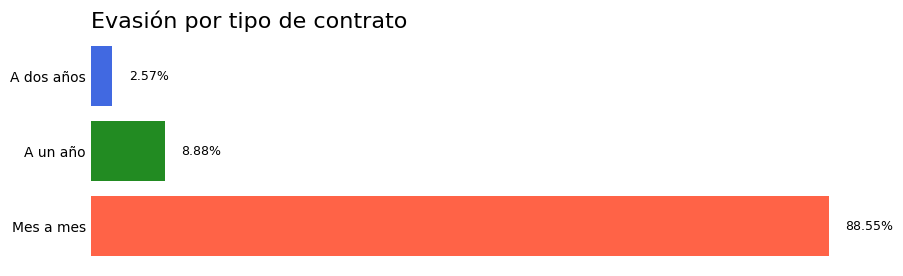

In [98]:
colores =['tomato', 'forestgreen', 'royalblue']

fig, ax = plt.subplots(figsize=(10,3))

ax.set_frame_on(False)
ax.xaxis.set_visible(False)
ax.tick_params(axis='y',which='both',size=0)

ax.barh(resultado_contrato_df['tipo_de_contrato'], resultado_contrato_df['porcentaje'],color=colores)
ax.set_title('Evasión por tipo de contrato',
             loc='left',fontsize=16)



# Crear etiquetas corregidas
etiquetas_correctas = []
for tipo in resultado_contrato_df['tipo_de_contrato']:
    if tipo == 'un_ano':
        etiquetas_correctas.append('A un año')
    elif tipo == 'dos_anos':
        etiquetas_correctas.append('A dos años')
    elif tipo == 'mes_a_mes':
        etiquetas_correctas.append('Mes a mes')

# Aplicar las etiquetas corregidas al eje Y
ax.set_yticks(range(len(etiquetas_correctas)))
ax.set_yticklabels(etiquetas_correctas)

for i,j in enumerate(resultado_contrato_df['porcentaje']):
  ax.text(j+2,i,  f"{j:.2f}%",color='black',fontsize=9,ha='left',va='center')

plt.show()

In [99]:
# Agrupar las filas por los valores de la columna 'contrato'
# Filtrar solo los clientes desafiliados (valor 'si' en columna desafiliado)
clientes_desafiliados = df[df['desafiliado'] == 'si']


# (ordenar para que filas del mismo contrato aparezcan juntas)
clientes_agrupados = clientes_desafiliados.sort_values('contrato')
clientes_agrupados

,id_cliente,desafiliado,genero,persona_mayor,pareja,dependientes,antiguedad,servicio_telefonico,multiples_lineas,servicio_de_internet,...,proteccion_de_dispositivos,soporte_tecnico,television_en_streaming,peliculas_en_streaming,contrato,facturacion_electronica,metodo_de_pago,cargo_diario,cargo_mensual,cargo_total
415,0617_aqnwt,si,femenino,0,si,no,64,no,sin_servicio_telefonico,dsl,...,si,si,no,si,dos_anos,no,cheque_electronico,1.6,47.8,3147.5
4533,6386_szzkh,si,femenino,0,si,si,49,si,si,fibra_optica,...,si,si,si,si,dos_anos,si,transferencia_bancaria_(automatico),3.6,108.0,5293.2
996,1447_pjgga,si,femenino,0,no,no,57,si,no,fibra_optica,...,si,no,si,si,dos_anos,si,cheque_electronico,3.2,95.2,5464.6
2155,3090_hawsu,si,masculino,0,no,no,61,si,si,fibra_optica,...,si,si,si,si,dos_anos,si,tarjeta_de_credito_(automatico),3.7,111.6,6876.0
3425,4853_rulsv,si,masculino,0,no,no,70,si,si,fibra_optica,...,no,si,si,si,dos_anos,si,tarjeta_de_credito_(automatico),3.5,104.0,7250.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,4250_zbwlv,si,masculino,0,no,no,68,si,si,fibra_optica,...,si,si,si,si,un_ano,no,cheque_electronico,3.6,108.4,7176.6
4676,6598_rffvi,si,masculino,0,no,no,2,si,no,no,...,sin_servicio_de_internet,sin_servicio_de_internet,sin_servicio_de_internet,sin_servicio_de_internet,un_ano,no,tarjeta_de_credito_(automatico),0.6,19.3,28.3
5338,7541_ylxcl,si,masculino,0,no,no,36,si,no,dsl,...,no,si,no,si,un_ano,si,cheque_por_correo,2.2,65.4,2498.4
474,0691_ifbqw,si,femenino,1,no,no,46,si,si,fibra_optica,...,si,no,si,si,un_ano,si,cheque_electronico,3.7,110.0,4874.8


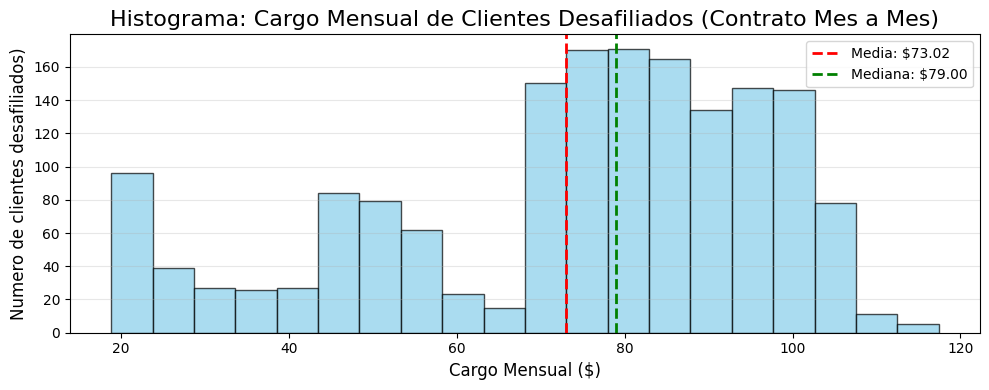

In [100]:
# Histograma contrato: mes_a_mes
# Filtrar clientes desafiliados
clientes_desafiliados = df[df['desafiliado'] == 'si']

# Filtrar solo los contratos mes_a_mes
clientes_mes_a_mes = clientes_desafiliados[clientes_desafiliados['contrato'] == 'mes_a_mes']

# Crear el histograma
plt.figure(figsize=(10, 4))

# Histograma básico
plt.hist(clientes_mes_a_mes['cargo_mensual'],
         bins=20,  # Número de rangos/barras
         color='skyblue',
         edgecolor='black',
         alpha=0.7)

# Personalizar el gráfico
plt.title('Histograma: Cargo Mensual de Clientes Desafiliados (Contrato Mes a Mes)',
          fontsize=16)
plt.xlabel('Cargo Mensual ($)', fontsize=12)
plt.ylabel('Numero de clientes desafiliados)', fontsize=12)

# Agregar líneas de cuadrícula para mejor lectura
plt.grid(axis='y', alpha=0.3)

# Mostrar estadísticas en el gráfico
mean_cargo = clientes_mes_a_mes['cargo_mensual'].mean()
median_cargo = clientes_mes_a_mes['cargo_mensual'].median()

plt.axvline(mean_cargo, color='red', linestyle='--', linewidth=2, label=f'Media: ${mean_cargo:.2f}')
plt.axvline(median_cargo, color='green', linestyle='--', linewidth=2, label=f'Mediana: ${median_cargo:.2f}')

# Agregar leyenda
plt.legend()

# Ajustar diseño
plt.tight_layout()

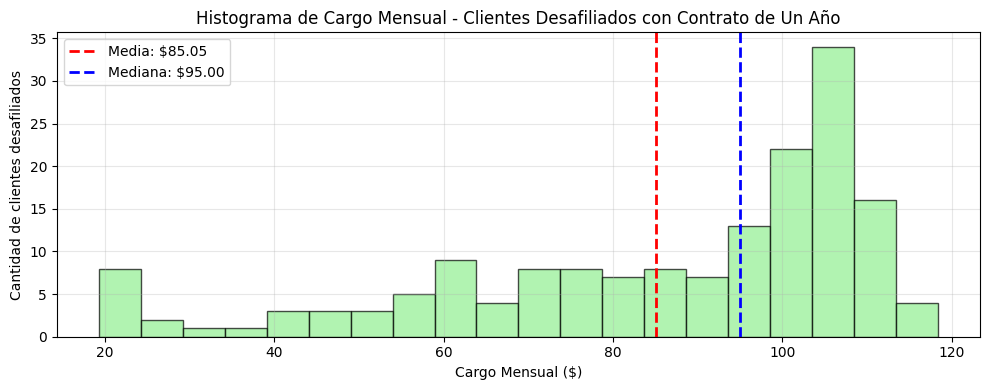

In [101]:
# Histograma contrato: de un año
# Filtrar clientes desafiliados
clientes_desafiliados = df[df['desafiliado'] == 'si']

# Filtrar únicamente contratos de un año
clientes_desafiliados_un_ano = clientes_desafiliados[clientes_desafiliados['contrato'] == 'un_ano']

# Calcular media y mediana
media = clientes_desafiliados_un_ano['cargo_mensual'].mean()
mediana = clientes_desafiliados_un_ano['cargo_mensual'].median()

# Crear el histograma
plt.figure(figsize=(10, 4))
plt.hist(clientes_desafiliados_un_ano['cargo_mensual'],
         bins=20,  # Puedes ajustar el número de bins según tus necesidades
         edgecolor='black',
         alpha=0.7,
         color='lightgreen')

# Agregar líneas de media y mediana
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: ${media:.2f}')
plt.axvline(mediana, color='blue', linestyle='--', linewidth=2, label=f'Mediana: ${mediana:.2f}')

# Agregar leyenda
plt.legend()

plt.xlabel('Cargo Mensual ($)')
plt.ylabel('Cantidad de clientes desafiliados')
plt.title('Histograma de Cargo Mensual - Clientes Desafiliados con Contrato de Un Año')
plt.grid(True, alpha=0.3)



plt.tight_layout()
plt.show()

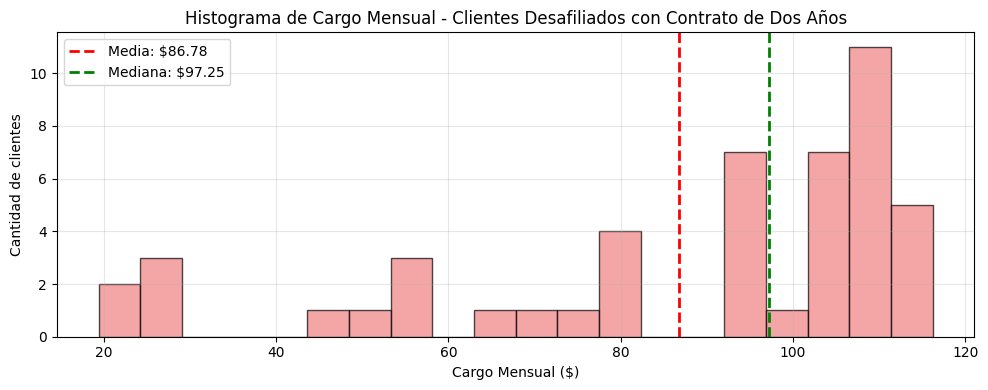

In [102]:
# # Histograma contrato: de dos años
# Filtrar clientes desafiliados
clientes_desafiliados = df[df['desafiliado'] == 'si']

# Filtrar únicamente contratos de dos años
clientes_desafiliados_dos_anos = clientes_desafiliados[clientes_desafiliados['contrato'] == 'dos_anos']

# Calcular media y mediana
media = clientes_desafiliados_dos_anos['cargo_mensual'].mean()
mediana = clientes_desafiliados_dos_anos['cargo_mensual'].median()

# Crear el histograma
plt.figure(figsize=(10, 4))
plt.hist(clientes_desafiliados_dos_anos['cargo_mensual'],
         bins=20,  # Puedes ajustar el número de bins según tus necesidades
         edgecolor='black',
         alpha=0.7,
         color='lightcoral')

# Agregar líneas de media y mediana
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: ${media:.2f}')
plt.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: ${mediana:.2f}')

# Agregar leyenda
plt.legend()

plt.xlabel('Cargo Mensual ($)')
plt.ylabel('Cantidad de clientes')
plt.title('Histograma de Cargo Mensual - Clientes Desafiliados con Contrato de Dos Años')
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

####***3. ANALISIS DE EVASION POR CONTRATO Y CARGO MENSUAL:***
De acuerdo al diagrama de barras horizontal de evasión por contrato, se podría empezar a intuir que la causa de evasión está relacionada con el tipo de contrato ***\"mes a mes"*** ya que el ***88.55%*** de los clientes con este tipo de contrato se desafiliaron mientras que el contrato de una año y dos años representan el***8.88%*** y ***2.57%*** respectivamente, de los clientes desafiliados. Sin embargo, los histogramas de ***\"cargo mensual"***, revelan que el precio no es la causa de la evasión por contrato mes a mes, ya que la mediana del valor pagado por los clientes desabonados con contrato mes a mes fue ***\$79.00*** mientras que en un contrato de un año y dos fueron ***\$95.00*** y ***\$97.25*** respectivamente, por lo tanto, los clientes con contrato mes a mes son los que pagaron menos por sus facturas




###***Evasión por método de pago***

In [103]:
# Filtrar solo los clientes desafiliados (valor 'si' en columna desafiliado)
clientes_desafiliados = df[df['desafiliado'] == 'si']

# Contar cuántos clientes desafiliados hay por método de pago
conteo_por_pago = clientes_desafiliados['metodo_de_pago'].value_counts()

# Crear DataFrame con los resultados
resultado_pago_df = pd.DataFrame({
    'metodo_de_pago': conteo_por_pago.index,
    'cantidad_desafiliados': conteo_por_pago.values
})

# Agregar porcentajes
total_desafiliados = resultado_pago_df['cantidad_desafiliados'].sum()
resultado_pago_df['porcentaje'] = (resultado_pago_df['cantidad_desafiliados'] / total_desafiliados * 100).round(2)

resultado_pago_df.head()

,metodo_de_pago,cantidad_desafiliados,porcentaje
0,cheque_electronico,1071,57.30
1,cheque_por_correo,308,16.48
2,transferencia_bancaria_(automatico),258,13.80
3,tarjeta_de_credito_(automatico),232,12.41


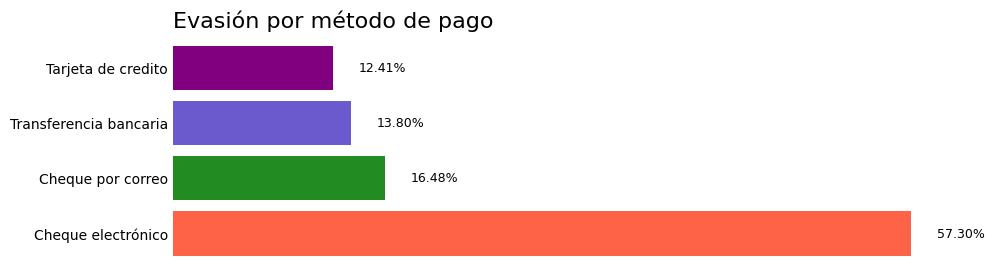

In [104]:
colores =['tomato', 'forestgreen', 'slateblue', 'purple']

fig, ax = plt.subplots(figsize=(10,3))

ax.set_frame_on(False)
ax.xaxis.set_visible(False)
ax.tick_params(axis='y',which='both',size=0)

ax.barh(resultado_pago_df['metodo_de_pago'], resultado_pago_df['porcentaje'],color=colores)
ax.set_title('Evasión por método de pago',
             loc='left',fontsize=16)


for i,j in enumerate(resultado_pago_df['porcentaje']):
  ax.text(j+2,i,  f"{j:.2f}%",color='black',fontsize=9,ha='left',va='center')


  # Crear etiquetas corregidas
etiquetas_correctas = []
for tipo in resultado_pago_df['metodo_de_pago']:
    if tipo == 'cheque_electronico':
        etiquetas_correctas.append('Cheque electrónico')
    elif tipo == 'cheque_por_correo':
        etiquetas_correctas.append('Cheque por correo')
    elif tipo == 'transferencia_bancaria_(automatico)':
        etiquetas_correctas.append('Transferencia bancaria')
    elif tipo == 'tarjeta_de_credito_(automatico)':
        etiquetas_correctas.append('Tarjeta de credito')

# Aplicar las etiquetas corregidas al eje Y
ax.set_yticks(range(len(etiquetas_correctas)))
ax.set_yticklabels(etiquetas_correctas)

plt.show()

###***4. ANALISIS POR METODO DE PAGO:***
Los clientes que pagaban sus facturas con ***\"cheque electrónico"***, fueron las que tuvieron el porcentaje mayor de evasión más alto ***(57.30%)***, posiblemente a que su adopción como método de pago es limitada, ya que las expectativas sobre el cheque electrónico como instrumento de pago se redujeron enormemente, ya que muchos comercios y plataformas aún no lo aceptan ampliamente debido a puede tomar entre 3 y 5 días hábiles para su procesamiento, razón por la que la empresa posiblemente decidido no seguir recibiendo este método de pago y los clientes decidieron desabonarse





###***Evasión por edad***

In [105]:
# Filtrar solo los clientes desafiliados
df_desafiliados = df[df['desafiliado'] == 'si']

# Crear el dataframe resultado_mayores_df
# Contar cuántos son mayores (>=65) y menores (<65) de 65 años
conteo_mayores = df_desafiliados['persona_mayor'].value_counts()

# Crear el dataframe resultado
resultado_mayores_df = pd.DataFrame({
    'mayor_65': ['si', 'no'],
    'cantidad': [conteo_mayores.get(1, 0), conteo_mayores.get(0, 0)]
})

# Calcular porcentajes
total = resultado_mayores_df['cantidad'].sum()
resultado_mayores_df['porcentaje'] = (resultado_mayores_df['cantidad'] / total * 100).round(2)
resultado_mayores_df

,mayor_65,cantidad,porcentaje
0,si,476,25.47
1,no,1393,74.53


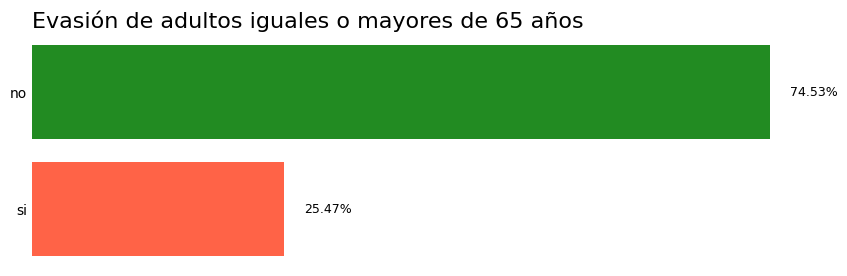

In [106]:
colores =['tomato', 'forestgreen']

fig, ax = plt.subplots(figsize=(10,3))

ax.set_frame_on(False)
ax.xaxis.set_visible(False)
ax.tick_params(axis='y',which='both',size=0)

ax.barh(resultado_mayores_df['mayor_65'], resultado_mayores_df['porcentaje'],color=colores)
ax.set_title('Evasión de adultos iguales o mayores de 65 años',
             loc='left',fontsize=16)


for i,j in enumerate(resultado_mayores_df['porcentaje']):
  ax.text(j+2,i,  f"{j:.2f}%",color='black',fontsize=9,ha='left',va='center')

plt.show()

###***5. ANALISIS POR ADULTES:***

Dado que apenas el ***25.47%***  de población que se dio de alta era mayor de 65 años frente a un alta mayoría del ***74.53%***, que se encuentran en su etapa productiva, se podría especular que la razón de este comportamiento es debido a que la población dada de alta tiene más de 65 años tiene mayor estabilidad económica y que posiblemente ya  están pensionados mientras que la población menor de 65 años no tiene este privilegio, razón por la cual la población menor de 65 años, busque contratos cortos como el mes a mes, el cual a pesar de tener las tarifas más económicas, no logran pagarlo.

###***Evasión por dependientes***

In [107]:
# Filtrar solo los clientes desafiliados
df_desafiliados = df[df['desafiliado'] == 'si']

# Contar los valores de la columna 'dependientes'
conteo_dependientes = df_desafiliados['dependientes'].value_counts()

# Crear el dataframe con dependientes, cantidad y porcentaje
resultado_dependientes_df = pd.DataFrame({
    'dependientes': conteo_dependientes.index,
    'cantidad': conteo_dependientes.values
})

# Calcular porcentajes
total = resultado_dependientes_df['cantidad'].sum()
resultado_dependientes_df['porcentaje'] = (resultado_dependientes_df['cantidad'] / total * 100).round(2)
resultado_dependientes_df

,dependientes,cantidad,porcentaje
0,no,1543,82.56
1,si,326,17.44


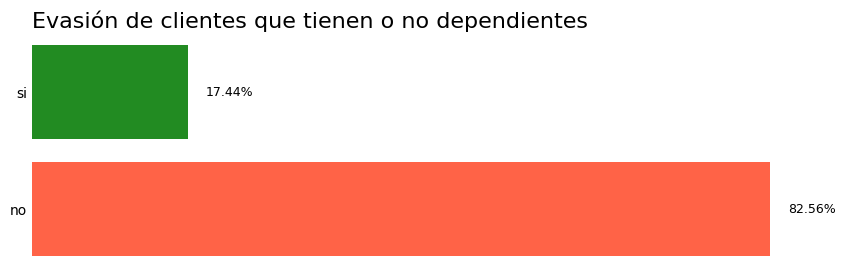

In [108]:
colores =['tomato', 'forestgreen']

fig, ax = plt.subplots(figsize=(10,3))

ax.set_frame_on(False)
ax.xaxis.set_visible(False)
ax.tick_params(axis='y',which='both',size=0)

ax.barh(resultado_dependientes_df['dependientes'], resultado_dependientes_df['porcentaje'],color=colores)
ax.set_title('Evasión de clientes que tienen o no dependientes',
             loc='left',fontsize=16)


for i,j in enumerate(resultado_dependientes_df['porcentaje']):
  ax.text(j+2,i,  f"{j:.2f}%",color='black',fontsize=9,ha='left',va='center')

plt.show()

###***6. ANALISIS DE EVASION POR TENER DEPENDIENTES:***
La gran mayoría, el ***82.56%*** de los clientes que se desafiliaron ***no tienen dependientes***, por decir hijos, lo cual sumado al analisis anterior (evasión por adultes), estamos hablando de una ***población posiblemente joven***, con edades mucho menores a los 65 años, ***que aún no tienen hijos pero inestables económicamente*** y segun la gráfica evasión por contrato, ***tendrian una suscripción mensual***.

###***Evasión por pareja***

In [109]:
# Filtrar solo los clientes desafiliados
df_desafiliados = df[df['desafiliado'] == 'si']

# Contar los valores de la columna 'pareja'
conteo_dependientes = df_desafiliados['pareja'].value_counts()

# Crear el dataframe con pareja, cantidad y porcentaje
resultado_pareja_df = pd.DataFrame({
    'pareja': conteo_dependientes.index,
    'cantidad': conteo_dependientes.values
})

# Calcular porcentajes
total = resultado_pareja_df['cantidad'].sum()
resultado_pareja_df['porcentaje'] = (resultado_pareja_df['cantidad'] / total * 100).round(2)
resultado_pareja_df

,pareja,cantidad,porcentaje
0,no,1200,64.21
1,si,669,35.79


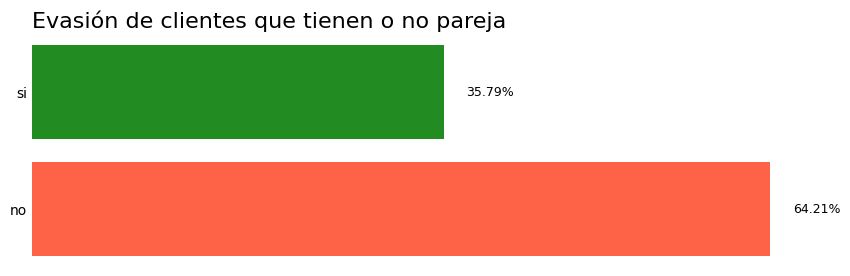

In [110]:
colores =['tomato', 'forestgreen']

fig, ax = plt.subplots(figsize=(10,3))

ax.set_frame_on(False)
ax.xaxis.set_visible(False)
ax.tick_params(axis='y',which='both',size=0)

ax.barh(resultado_pareja_df['pareja'], resultado_pareja_df['porcentaje'],color=colores)
ax.set_title('Evasión de clientes que tienen o no pareja',
             loc='left',fontsize=16)


for i,j in enumerate(resultado_pareja_df['porcentaje']):
  ax.text(j+2,i,  f"{j:.2f}%",color='black',fontsize=9,ha='left',va='center')

plt.show()

###***7. ANALISIS POR TENER PAREJA:***
La población que canceló su suscripción que no tiene pareja es aproximadamente el doble ***(64.21%)*** de la población que si tiene pareja ***(35.79%)***, lo cual sumado a lo dicho en el análisis anterior, indicaría que los clientes que se dieron de alta, son una población sin vínculos afectivos.


###***Evasión por antigüedad***

In [111]:
# Filtrar solo los clientes desafiliados
df_desafiliados = df[df['desafiliado'] == 'si']

# Calcular el histograma para obtener bins y frecuencias

import numpy as np
n, bins = np.histogram(df_desafiliados['antiguedad'], bins=30)

# Crear listas para el dataframe
periodo_de_antiguedad = []
cantidad = []

# Generar los períodos y sus cantidades
for i in range(len(bins)-1):
    periodo_label = f'{bins[i]:.1f}-{bins[i+1]:.1f}'
    periodo_de_antiguedad.append(periodo_label)
    cantidad.append(int(n[i]))

# Crear el dataframe
resultado_periodos_df = pd.DataFrame({
    'periodo_de_antiguedad': periodo_de_antiguedad,
    'cantidad': cantidad
})

# Calcular porcentajes
total = resultado_periodos_df['cantidad'].sum()
resultado_periodos_df['porcentaje'] = (resultado_periodos_df['cantidad'] / total * 100).round(2)

# Filtrar solo los períodos que tienen clientes (cantidad > 0)
resultado_periodos_df = resultado_periodos_df[resultado_periodos_df['cantidad'] > 0].reset_index(drop=True)

resultado_periodos_df

,periodo_de_antiguedad,cantidad,porcentaje
0,1.0-3.4,597,31.94
1,3.4-5.7,147,7.87
2,5.7-8.1,133,7.12
3,8.1-10.5,91,4.87
4,10.5-12.8,69,3.69
5,12.8-15.2,99,5.30
6,15.2-17.6,54,2.89
7,17.6-19.9,43,2.30
8,19.9-22.3,62,3.32
9,22.3-24.7,36,1.93


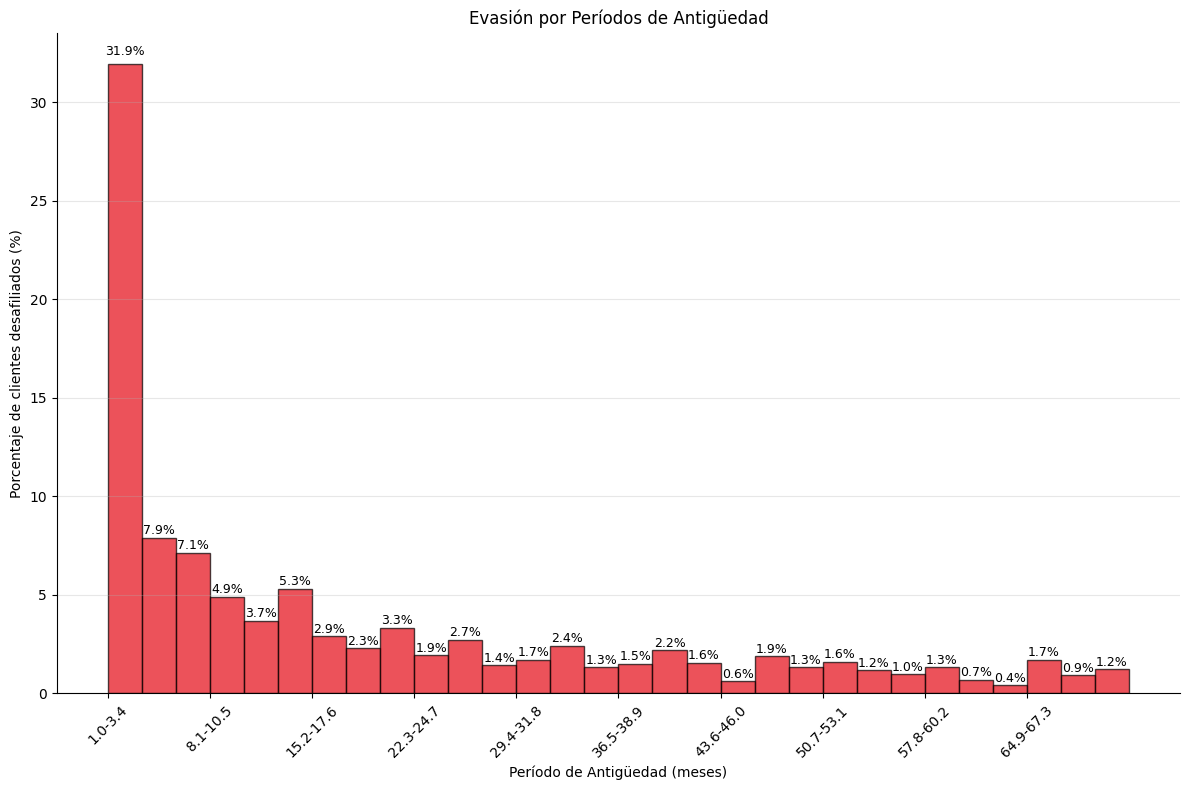

In [112]:
# Código corregido para histograma con datos específicos
plt.figure(figsize=(12, 8))

# Crear histograma usando weights para las frecuencias personalizadas
n_hist, bins_hist, patches = plt.hist(resultado_periodos_df['periodo_de_antiguedad'],
                                      weights=resultado_periodos_df['porcentaje'],
                                      bins=len(resultado_periodos_df),
                                      color='#E50914',
                                      alpha=0.7,
                                      edgecolor='black')

# Mostrar porcentajes encima de cada barra
for i, (height, bin_center) in enumerate(zip(n_hist, (bins_hist[:-1] + bins_hist[1:]) / 2)):
    plt.text(bin_center, height + height*0.01, f'{height:.1f}%',
             ha='center', va='bottom', fontsize=9)

# Configuración adicional
plt.xlabel('Período de Antigüedad (meses)')
plt.ylabel('Porcentaje de clientes desafiliados (%)')
plt.title('Evasión por Períodos de Antigüedad')

# Mostrar etiquetas del eje X cada 5 barras
x_ticks = bins_hist[:-1][::3]  # Tomar cada 5 valores
x_labels = [resultado_periodos_df['periodo_de_antiguedad'].iloc[i] for i in range(0, len(resultado_periodos_df), 3)]
plt.xticks(x_ticks, x_labels, rotation=45)

plt.grid(True, alpha=0.3, axis='y')

# Quitar marco superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

###***8. ANALISIS POR ANTIGÜEDAD:***
Como se puede notar, el primer periodo comprendido entre ***1.0 y 3.4 meses***, fue ampliamente el mayor periodo de fuga de clientes frente a los demás periodos, con un porcentaje de ***31.9%***, lo reitera la hipótesis de una población joven inestablemente económicamente que dura máximo 4 meses y cancela su plan. ***Lo cual es responde porque el contrato con más evasión sea el mensual***.


###***Evasión por Cargos totales por periodos de Antigüedad***

In [113]:
import numpy as np

# Filtrar solo los clientes desafiliados
df_desafiliados = df[df['desafiliado'] == 'si']

# Crear los mismos bins (períodos) que en el histograma anterior
bins = np.histogram_bin_edges(df_desafiliados['antiguedad'], bins=30)

# Crear etiquetas de períodos
periodos = []
for i in range(len(bins)-1):
    periodos.append(f'{bins[i]:.1f}-{bins[i+1]:.1f}')

# Asignar cada cliente a su período correspondiente
df_desafiliados_copy = df_desafiliados.copy()
df_desafiliados_copy['periodo_idx'] = pd.cut(df_desafiliados_copy['antiguedad'], bins=bins, labels=False, include_lowest=True)
df_desafiliados_copy['periodo'] = pd.cut(df_desafiliados_copy['antiguedad'], bins=bins, labels=periodos, include_lowest=True)

# Agrupar por período y sumar los cargos totales
agrupado = df_desafiliados_copy.groupby('periodo')['cargo_total'].sum().reset_index()
agrupado.columns = ['periodo', 'suma_de_cargos_total']

# Calcular porcentajes
total_cargos = agrupado['suma_de_cargos_total'].sum()
agrupado['porcentaje'] = (agrupado['suma_de_cargos_total'] / total_cargos * 100).round(2)

# Crear el dataframe final
resultado_cargos_df = agrupado.copy()

resultado_cargos_df

<ipython-input-113-6a177b58342e>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupado = df_desafiliados_copy.groupby('periodo')['cargo_total'].sum().reset_index()


,periodo,suma_de_cargos_total,porcentaje
0,1.0-3.4,57098.1,1.99
1,3.4-5.7,46431.7,1.62
2,5.7-8.1,70226.9,2.45
3,8.1-10.5,65817.0,2.30
4,10.5-12.8,59634.1,2.08
5,12.8-15.2,106177.9,3.71
6,15.2-17.6,68775.7,2.40
7,17.6-19.9,61729.2,2.16
8,19.9-22.3,102837.8,3.59
9,22.3-24.7,70543.8,2.46


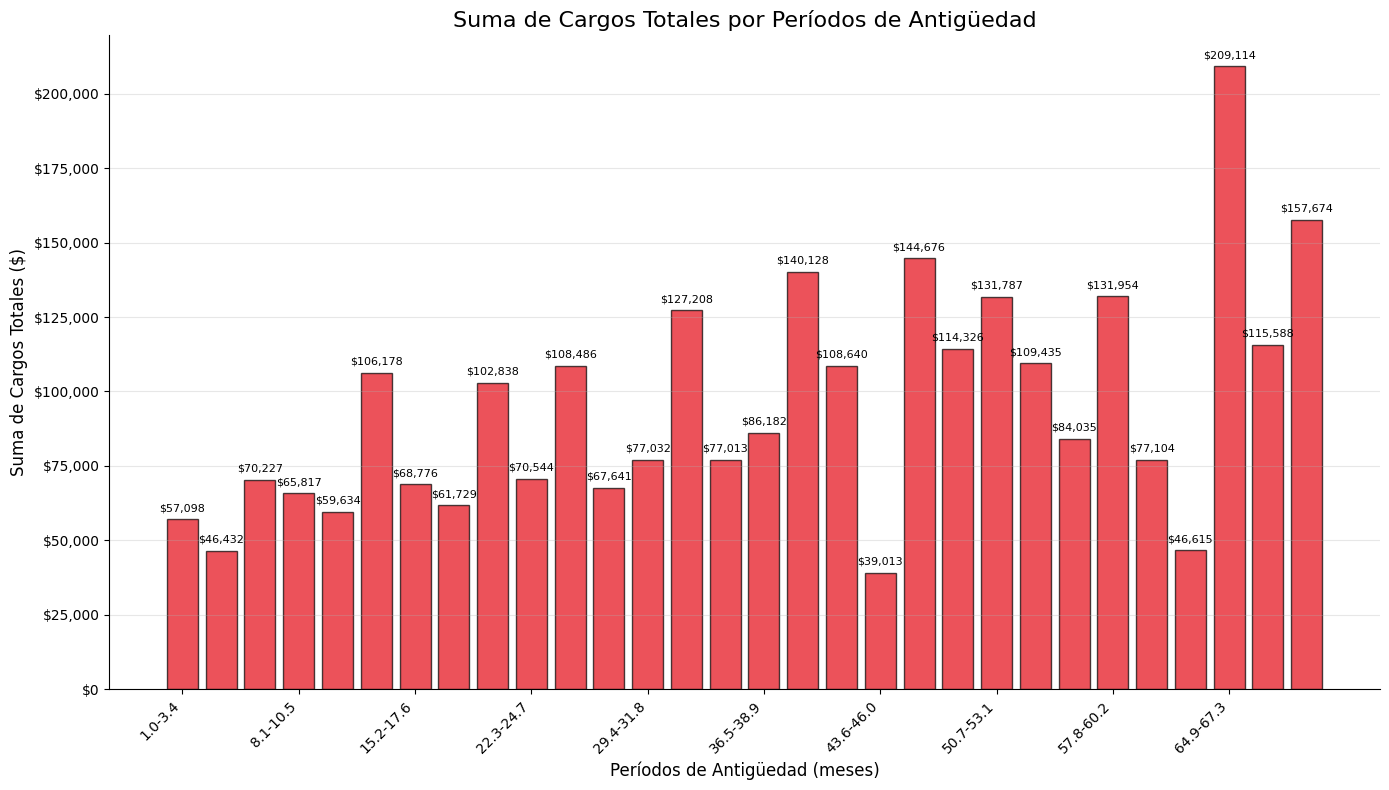

In [114]:
# Crear el histograma
plt.figure(figsize=(14, 8))

# Obtener los centros de los bins para el eje x
bin_centers = []
sumas_por_bin = []

for i in range(len(bins)-1):
    bin_center = (bins[i] + bins[i+1]) / 2
    bin_centers.append(bin_center)

    # Encontrar la suma correspondiente a este período
    periodo_label = f'{bins[i]:.1f}-{bins[i+1]:.1f}'
    suma = agrupado[agrupado['periodo'] == periodo_label]['suma_de_cargos_total']
    sumas_por_bin.append(suma.iloc[0] if len(suma) > 0 else 0)

# Crear el histograma como gráfico de barras
width = (bins[1] - bins[0]) * 0.8  # Ancho de las barras
bars = plt.bar(bin_centers, sumas_por_bin, width=width, color='#E50914', alpha=0.7, edgecolor='black')

# Mostrar la suma en la parte superior de cada barra (solo las más significativas)
max_suma = max(sumas_por_bin)
for i, (center, suma) in enumerate(zip(bin_centers, sumas_por_bin)):
    if suma > max_suma * 0.05:  # Solo mostrar si es mayor al 5% del máximo
        plt.text(center, suma + max_suma*0.01,
                f'${suma:,.0f}', ha='center', va='bottom', fontsize=8)

# Personalizar el gráfico
plt.title('Suma de Cargos Totales por Períodos de Antigüedad', fontsize=16)
plt.xlabel('Períodos de Antigüedad (meses)', fontsize=12)
plt.ylabel('Suma de Cargos Totales ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Quitar marco superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Configurar etiquetas del eje x (mostrar cada 3 para evitar solapamiento)
x_ticks = bin_centers[::3]
x_labels = [f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(0, len(bins)-1, 3)]
plt.xticks(x_ticks, x_labels, rotation=45, ha='right')

# Formatear eje y con separadores de miles
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

###***9. ANALISIS DE RECAUDO TOTAL POR PERIODOS DE ANTIGÜEDAD:***
En el primer periodo entre ***1-3.4 meses***, no se vio un recaudo importante ***($57,098)***, debido a que fue el periodo de tiempo más corto, por lo que a medida que aumenta el tiempo, lógicamente se aumenta el recaudo, por eso las ultimas barras son más altas. Sin embargo, hay algunas barras atípicas que son bajas posiblemente porque esos clientes que cancelaron sus planes en ese periodo de antigüedad no tenían planes costosos o fueron pocos los que se dieron de alta en ese periodo. La barra más alta con una aportación total de ***\$219,114***, probablemente debe corresponder a clientes con planes de uno o dos años por que llegaron a una antigüedad de ***5.5 años*** en promedio, los cuales tienen los planes más costosos con mensualidades en promedio de ***\$96***. Sin embargo, estos datos no aportan mucho al estudio de evasión porque no explican porque en el primer periodo ***(1-3.4) meses***, se desafilio la mayoría de clientes.

In [117]:
# Creacion de archivo .txt para las versiones de las dependecias usadas en el proyecto
contenido = """
pandas==1.5.3
numpy==1.23.5
matplotlib==3.7.1
""".strip()

# Crear el archivo requirements.txt
with open("requirements.txt", "w") as archivo:
    archivo.write(contenido)



#📄Informe final

#***Introducción***

##***Contexto del Problema***

En el competitivo mercado de las telecomunicaciones, la retención de clientes se ha convertido en uno de los desafíos más críticos para las empresas del sector.***Telecom X*** enfrenta actualmente una problemática significativa: una alta tasa de cancelaciones de servicios que impacta directamente en la rentabilidad y crecimiento sostenible de la compañía.

El fenómeno conocido como ***"Churn" o evasión de clientes*** representa la pérdida de suscriptores que deciden cancelar sus servicios y migrar hacia la competencia o simplemente discontinuar el uso de servicios de telecomunicaciones. Esta situación no solo implica la pérdida inmediata de ingresos recurrentes, sino también el incremento en los costos de adquisición de nuevos clientes para compensar las bajas.
Importancia Estratégica del Análisis.

La industria de telecomunicaciones se caracteriza por sus altos costos de adquisición de clientes nuevos, los cuales son superiores que los costos asociados a retener a un cliente existente. Por esta razón, comprender los patrones y factores que influyen en la decisión de los clientes de abandonar los servicios se vuelve fundamental para optimizar la rentabilidad, reduciendo la pérdida de ingresos asociados a la evasion de suscriptores.

##***Objetivo del Análisis***
El presente análisis tiene como ***objetivo principal*** identificar y comprender los factores determinantes que influyen en la evasión de clientes de Telecom X, mediante el procesamiento y análisis exhaustivo de datos históricos de suscriptores.

##***Objetivos Específicos***

***1. Caracterizar el perfil del cliente que se retira:*** Analizar las caracteristicas sociales de los clientes que cancelan sus servicios.

***2. Generar insights accionables:*** Proporcionar recomendaciones basadas en datos que permitan al equipo comercial y de retención desarrollar estrategias efectivas.












##***Limpieza y Tratamiento de Datos:***
Describe los pasos realizados para ***importar, limpiar y procesar los datos.***

Para ***importar*** el data set que viene en un archivo .json, es necesario:
1. Importar la biblioteca pandas: import pandas as pd
2. Leer el archivo .json: df = pd.read_json('/content/TelecomX_Data.json')
3. Verificar que haya sido importado: df.head()

Para realizar la etapa de ***transformación*** de los datos fue necesario:
1. Normalizar y concatenar las columnas .json del dataframe: df_customer = pd.json_normalize(df['customer'])...
2. Verificar si el dataframe tien valores nulos en cada columna:
df.isnull().sum()
3. Verificar si hay filas duplicadas: duplicados_completos = df[df.duplicated(keep=False)] y eliminarlas si las hay
4. Verificar que los tipos de datos del dataframe sean consistentes:
df.dtypes
5. Formatear los encabezados de las columnas y sus valores: Pasar todo a minuscula, cambiar los espcios por _, eliminar espacios al comienzo y al final, traducir los strings al español, redondear los numeros decimals a un digito.
6. Verificar valores únicos por cada columna
7. Eliminar las filas con valores faltanten en la columna churn = desafiliado: df = df[df['churn'] != '']
8. Restablecer los índices: df.reset_index(drop=True, inplace=True)




##***Análisis Exploratorio de Datos:***

A continuación se presentaán los analisis representaivos que fueron influyentes en explicar el fenomeno de evasión en Telecom X, y no seran tenidos en cuenta aquellos analiss que no aportaron a la explicacion d e este feneomeno. de realizará un análisis por cada gráfica para poder identificar patrones.

####***1. ANALISIS DE DESAFILIADOS:***
Para contextualizar, el porcentaje de desafiliación fue de 26,54%, este porcentaje representa aproximadamente una cuarta parte del total de los clientes, lo cual es una proporción significativa

####***2. ANALISIS DE EVASION POR CONTRATO Y CARGO MENSUAL:***
De acuerdo al diagrama de barras horizontal de evasión por contrato, se podría empezar a intuir que la causa de evasión está relacionada con el tipo de contrato ***\"mes a mes"*** ya que el ***88.55%*** de los clientes con este tipo de contrato se desafiliaron mientras que el contrato de una año y dos años representan el***8.88%*** y ***2.57%*** respectivamente, de los clientes desafiliados. Sin embargo, los histogramas de ***\"cargo mensual"***, revelan que el precio no es la causa de la evasión por contrato mes a mes, ya que la mediana del valor pagado por los clientes desabonados con contrato mes a mes fue ***\$79.00*** mientras que en un contrato de un año y dos fueron ***\$95.00*** y ***\$97.25*** respectivamente, por lo tanto, los clientes con contrato mes a mes son los que pagaron menos por sus facturas

####***3. ANALISIS POR ADULTES:***
Dado que apenas el ***25.47%***  de población que se dio de alta era mayor de 65 años frente a un alta mayoría del ***74.53%***, que ***se encuentran en su etapa productiva***, se podría especular que la razón de este comportamiento es debido a que la población dada de alta tiene más de 65 años tiene mayor estabilidad económica y que posiblemente ya  están pensionados mientras que la población menor de 65 años no tiene este privilegio, razón por la cual la población menor de 65 años ***esta en la busqueda de contratos cortos como el mes a mes, el cual a pesar de tener las tarifas más económicas, no logran pagarlo.***

####***4. ANALISIS DE EVASION POR TENER DEPENDIENTES:***
La gran mayoría, el ***82.56%*** de los clientes que se desafiliaron ***no tienen dependientes, por decir hijos***, lo cual sumado al analisis anterior (evasión por adultes), estamos hablando de una ***población posiblemente joven***, con edades mucho menores a los 65 años, ***que aún no tienen hijos pero son inestables económicamente*** y segun la gráfica evasión por contrato, ***tendrian una suscripción mensual***.

####***5. ANALISIS POR TENER PAREJA:***
La población que canceló su suscripción que no tiene pareja es aproximadamente el doble ***(64.21%)*** de la población que si tiene pareja ***(35.79%)***, lo cual sumado a lo dicho en el análisis anterior, indicaría que los clientes que se dieron de alta, son una población ***sin vínculos afectivos, ya que de lo contrario sumarian mas gastos***.

####***6. ANALISIS POR ANTIGÜEDAD:***
Como se puede notar, el primer periodo comprendido entre ***1.0 y 3.4 meses***, fue ampliamente el mayor periodo de fuga de clientes frente a los demás periodos, con un porcentaje de ***31.9%***, lo reitera la hipótesis de una población joven inestablemente económicamente que dura máximo 4 meses y cancela su plan. ***Lo cual es responde porque el contrato con más evasión sea el mensual***.




##***Conclusión:***
De acuerdo al análisis realizado se puede concluir que la población que está desertando de Telecom X es una población joven, sin hijos y sin pareja, ya que no puede asumir responsabilidades económicas porque son inestable financieramente, por lo cual opta por una afiliación mensual, y al ver que no puede con dicha deuda decide retirarse en el primer trimestre.

##***Recomendación:***

De acuerdo a la conclusión presentada, para que Telecom X pueda recuperar ese segmento de clientes (jóvenes), tiene que crear nuevas campañas de marketing con precios mas exequibles y con planes más acorde a sus necesidades, pensado en su situación económica y si es posible crear planes anuales con el fin de fidelizar a esos clientes.

In [116]:
contenido = """
pandas==1.5.3
numpy==1.23.5
matplotlib==3.7.1
""".strip()

# Crear el archivo requirements.txt
with open("requirements.txt", "w") as archivo:
    archivo.write(contenido)

print("Archivo requirements.txt creado correctamente.")


Archivo requirements.txt creado correctamente.
